<a href="https://colab.research.google.com/github/VSharma27/MAJOR-PROJECT/blob/main/MAJOR_PROJECT_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
# Importing XGBoost
from xgboost import XGBClassifier

**Reading Dataset**



In [3]:
# Reading the dataset
df = pd.read_csv('/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Understanding the Dataset

In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Checking for Missing Values**

In [8]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [9]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [10]:

normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [11]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

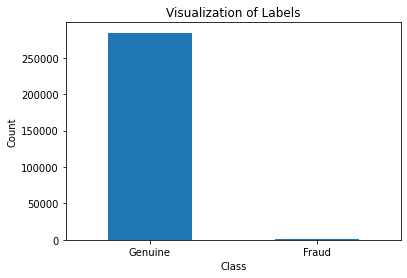

In [12]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [13]:
df.drop('Time', axis=1, inplace=True)

In [14]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [15]:
# Putting target variable to y
y = df['Class']

**Splitting of Dataset**

In [16]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=200)

In [17]:
# Instantiate the Scaler
scaler = StandardScaler()

In [18]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [19]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
52820,1.173017,-0.128571,0.643248,0.233061,-0.628271,-0.485415,-0.241527,-0.116303,0.366875,-0.224226,-0.562480,0.574505,1.206068,-0.159225,1.311652,0.655737,-0.729532,-0.122320,-0.027099,0.110318,-0.085315,-0.310269,-0.018421,-0.064544,0.191526,0.469073,-0.028448,0.028616,-0.116786
263369,2.060703,-0.111969,-1.078747,0.426953,-0.224233,-1.239221,0.127565,-0.287425,0.669409,0.098129,-0.877883,-0.009819,-0.786206,0.444902,0.132500,-0.067963,-0.236323,-0.768379,0.148437,-0.278700,-0.298327,-0.767055,0.351342,0.023082,-0.328359,0.198207,-0.076305,-0.061637,-0.342951
117614,-2.450059,-0.439402,1.000223,-1.286907,0.315900,-0.210950,0.932748,-0.114193,0.524442,0.547297,1.436820,0.771434,0.422640,-0.395860,0.261814,0.580279,-0.979744,-0.324681,-0.654993,0.154974,-0.329903,-0.033022,0.158976,-0.246085,-0.133518,0.757618,0.451441,0.547734,0.411409
51000,-1.687699,-1.741444,1.221717,0.969788,1.125876,-1.367488,-0.922301,0.157094,0.092765,0.234306,0.900478,0.378650,-0.997098,0.342724,0.050528,-0.781989,0.527938,0.175670,2.569091,0.398613,0.025188,-0.139331,0.418568,0.401896,-0.918314,1.026917,-0.174339,0.564932,-0.142391
151957,1.922549,-0.332096,-0.918880,0.435365,-0.221822,-0.634371,-0.149269,-0.206034,2.186475,-0.420115,1.686601,-1.320344,1.259346,1.732580,-1.814707,-0.558234,0.534444,0.236288,0.244774,-0.225169,0.012316,0.496653,0.021198,0.016844,0.101791,0.132931,-0.061352,-0.072694,-0.187529


In [20]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212072,1.518438,-1.679668,-3.093086,-0.388660,0.164518,-0.769884,0.859728,-0.480274,-1.287091,1.059841,0.160120,-0.243862,-0.980436,1.146851,-0.854013,-1.858838,-0.145729,1.457679,-0.337467,0.112677,0.133875,0.049919,-0.434445,0.413963,0.367950,0.952559,-0.209431,-0.035346,1.186333
7676,-2.372834,-0.612308,3.224686,3.758968,-0.483226,1.615778,-1.719115,1.101559,1.853864,0.467220,0.978996,-2.285457,0.157705,0.731574,-2.025575,-0.624413,1.654810,0.788221,0.983593,0.350868,-0.021965,0.630479,-0.499405,0.021481,0.060255,0.499542,0.329417,-0.259837,-0.106940
83150,1.259924,0.259231,0.516221,0.620255,-0.469781,-0.990647,0.071091,-0.213189,0.025140,-0.069639,-0.192358,0.439239,0.445544,0.213424,1.017437,0.296300,-0.429983,-0.558768,-0.120364,-0.084556,-0.255738,-0.733569,0.134905,0.383876,0.221633,0.094060,-0.028236,0.019346,-0.342951
125745,-0.432809,0.441564,2.135267,1.571277,0.007931,1.057945,-0.090015,0.405717,0.597818,-0.578365,-1.667500,0.406568,-0.271180,-0.767383,-1.352631,-1.491651,0.969220,-0.874141,1.488738,0.010397,-0.325426,-0.474865,-0.051495,-0.426681,-0.322176,-0.406189,0.233169,0.152133,-0.320640
84402,-1.152360,0.039113,1.395097,0.304623,1.032487,0.037363,0.547830,0.280413,-0.416573,-0.628372,0.534569,0.643442,-0.645044,0.215940,-1.374269,-0.260110,-0.337424,-0.188210,-0.514797,0.076870,0.108875,0.131383,-0.008996,-0.320344,0.203435,-0.489482,0.074864,0.119731,-0.072124


**Checking the Skewness**

In [21]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

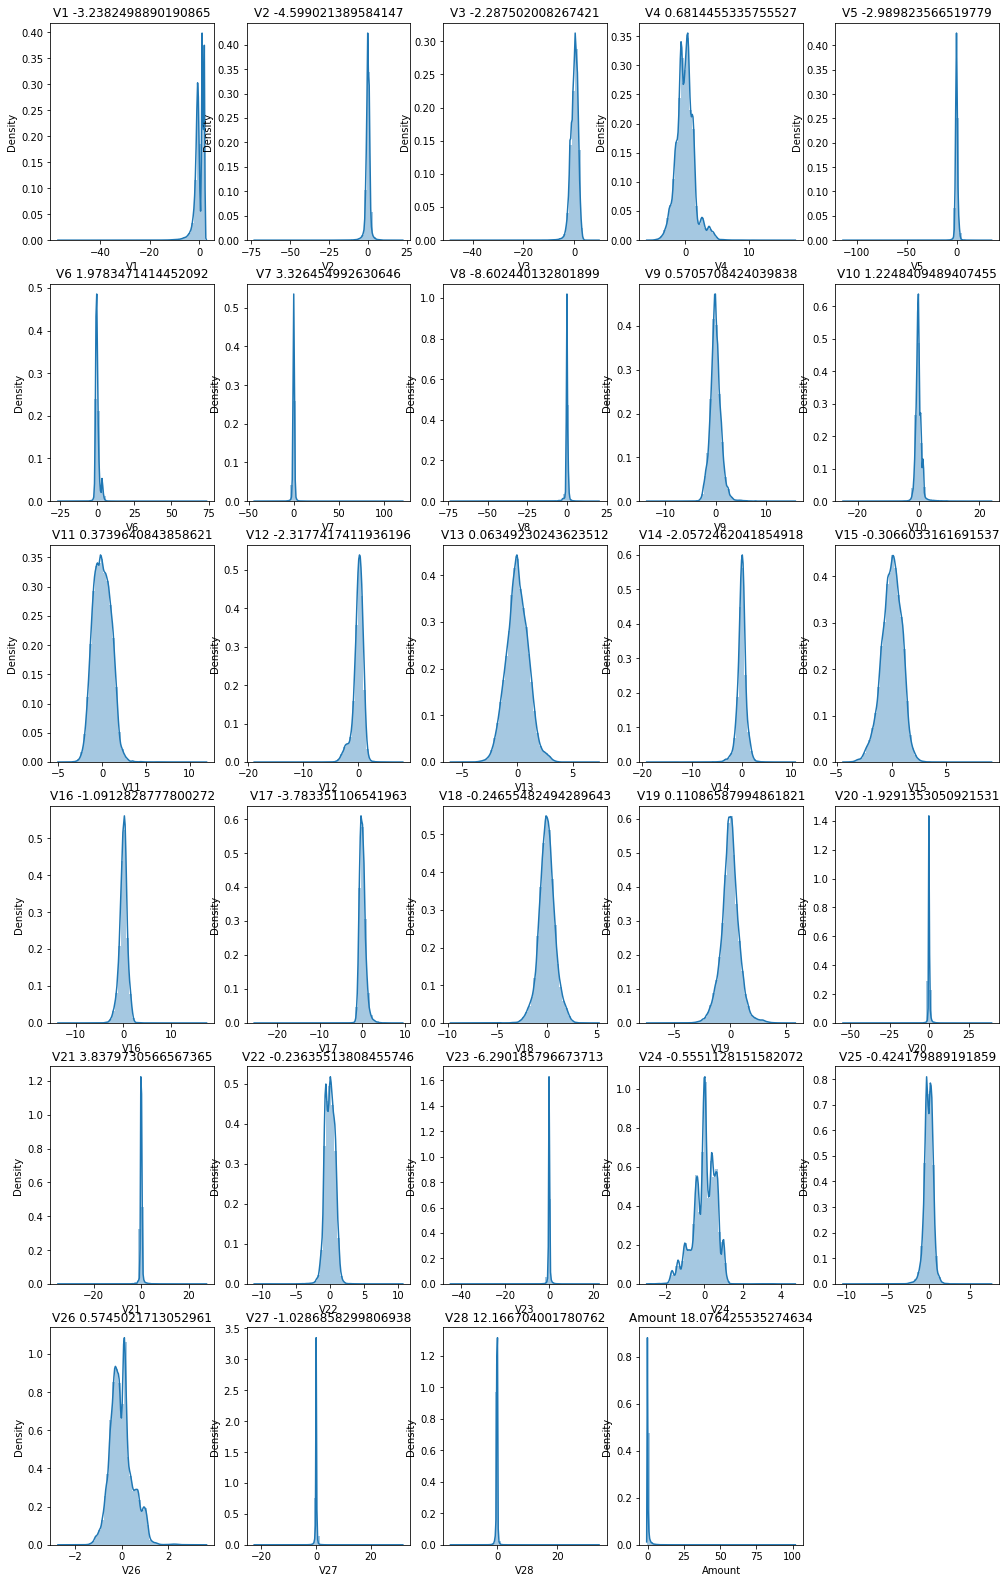

In [22]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

**Mitigate skweness with PowerTransformer**

In [23]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [24]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

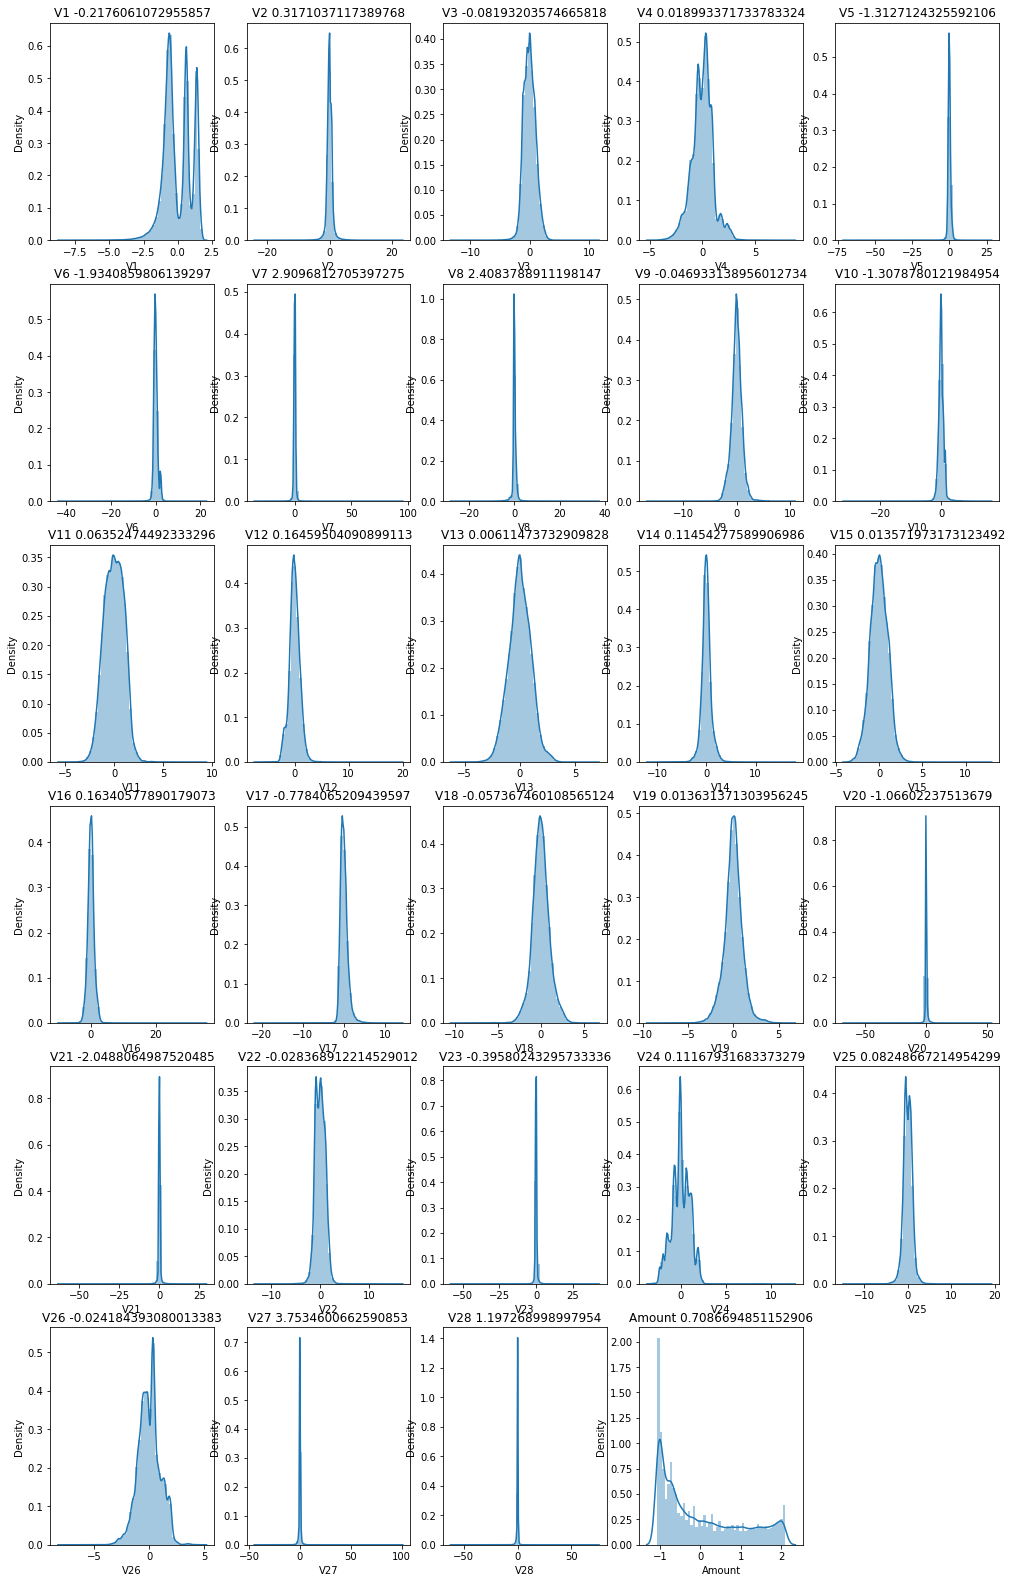

In [25]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [26]:
X_train.isnull().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
dtype: bool

**Building SMOTE**

In [27]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [28]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454894, 29)


In [29]:
from collections import Counter
counter=Counter(y_train_smote)
print('After Applying SMOTE', counter)

After Applying SMOTE Counter({0: 227447, 1: 227447})


**Building XGBOOST**

In [32]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
params = {'learning_rate': [0.2, 0.6,0.4,0.1], 
             'subsample': [ 0.6, 0.8,1],
          'max_depth':[4,7,10]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = params, 
                        scoring= 'roc_auc', n_iter=6,
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
                   n_iter=6,
                   param_distributions={'learning_rate': [0.2, 0.6, 0.4, 0.1],
                                        'max_depth': [4, 7, 10],
                                        'subsample': [0.6, 0.8, 1]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [33]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,192.124457,1.360169,1.414828,0.028635,0.6,4,0.2,"{'subsample': 0.6, 'max_depth': 4, 'learning_r...",0.999969,0.999987,0.999990,0.999982,0.000009,5,0.999999,0.999999,0.999999,0.999999,1.995254e-07
1,348.269946,4.094222,2.556516,0.026346,1,7,0.2,"{'subsample': 1, 'max_depth': 7, 'learning_rat...",0.999978,0.999995,0.999997,0.999990,0.000008,3,1.000000,1.000000,1.000000,1.000000,6.409876e-17
2,290.096623,1.644580,2.052458,0.018164,0.8,10,0.4,"{'subsample': 0.8, 'max_depth': 10, 'learning_...",0.999980,0.999994,0.999997,0.999990,0.000007,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,460.370832,11.818672,3.191680,0.273640,0.8,10,0.1,"{'subsample': 0.8, 'max_depth': 10, 'learning_...",0.999976,0.999995,0.999994,0.999988,0.000009,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,215.323832,1.348152,1.547827,0.073645,0.8,4,0.2,"{'subsample': 0.8, 'max_depth': 4, 'learning_r...",0.999970,0.999985,0.999989,0.999981,0.000008,6,0.999998,0.999999,0.999999,0.999999,2.739501e-07
5,217.539099,1.348783,1.538222,0.017602,0.8,4,0.4,"{'subsample': 0.8, 'max_depth': 4, 'learning_r...",0.999981,0.999994,0.999997,0.999991,0.000007,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [34]:
model_cv.best_params_

{'learning_rate': 0.4, 'max_depth': 4, 'subsample': 0.8}

In [36]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.4,
          'max_depth': 4, 
          'n_estimators':200,
          'subsample':0.8,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.4, 'max_depth': 4, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.8})

**Prediction on the train set**

In [37]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [38]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[224745   2702]
 [  6627 220820]]


In [39]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [40]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9794919255914565
Sensitivity:- 0.9708635418361201
Specificity:- 0.9881203093467928


In [41]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    227447
           1       0.99      0.97      0.98    227447

    accuracy                           0.98    454894
   macro avg       0.98      0.98      0.98    454894
weighted avg       0.98      0.98      0.98    454894



In [42]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [43]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9984070369118659

In [44]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

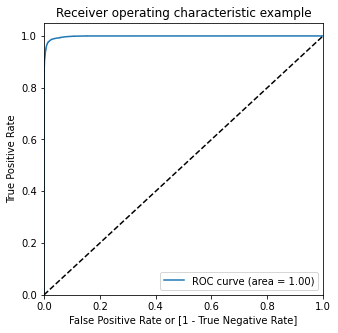

In [45]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

**Prediction on the test set**

In [46]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [47]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56209   659]
 [    8    86]]


In [48]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [49]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9882904392401952
Sensitivity:- 0.9148936170212766
Specificity:- 0.9884117605683337


In [50]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56868
           1       0.12      0.91      0.21        94

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [53]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [54]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9873768892201276

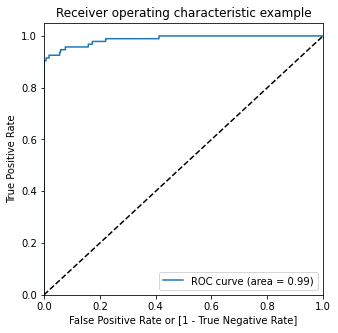

In [55]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)